In [ ]:
!pip install -qU  malariagen_data scikit-allel petl

In [2]:
import malariagen_data
import allel
import numpy as np
import pandas as pd
import functools
#import dask
#from dask.diagnostics.progress import ProgressBar
#dask.config.set(**{'array.slicing.split_large_chunks': True})
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
#import matplotlib_venn as venn
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
from tqdm.dask import TqdmCallback
from tqdm.auto import tqdm

In [18]:
sns.set_context('paper')
sns.set_style('white')
sns.set_style('ticks')
rcParams = plt.rcParams
base_font_size = 11
rcParams['font.size'] = base_font_size
rcParams['axes.titlesize'] = base_font_size
rcParams['axes.labelsize'] = base_font_size
rcParams['xtick.labelsize'] = base_font_size
rcParams['ytick.labelsize'] = base_font_size
rcParams['legend.fontsize'] = base_font_size
rcParams['axes.linewidth'] = .5
rcParams['lines.linewidth'] = .5
rcParams['patch.linewidth'] = .5
rcParams['ytick.direction'] = 'out'
rcParams['xtick.direction'] = 'out'
#rcParams['savefig.jpeg_quality'] = 100
rcParams['lines.markeredgewidth'] = .5
rcParams['figure.max_open_warning'] = 1000
rcParams['figure.dpi'] = 120
rcParams['figure.facecolor'] = 'w'

In [ ]:
#Mounting Google Drive
import os
import glob
from google.colab import drive
drive.mount("drive")

# make dir
results_dir = "drive/MyDrive/"
os.makedirs(results_dir, exist_ok=True)

In [ ]:
ag3 = malariagen_data.Ag3("gs://vo_agam_release/", pre=True)
ag3

In [6]:
## Selecting and defining the samples metadata
sets = ["1191-VO-MULTI-OLOUGHLIN-VMF00106", "1191-VO-MULTI-OLOUGHLIN-VMF00140",
        "AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C"]
df_samples = ag3.sample_metadata(sample_sets=sets)

# Function for plotting

In [7]:
# Compute the figure of sequence divergence
def fig_h12(x, y, title=None,  ax=None, color=None, ylab=None, xlab=None, fig_name=None):
  #define ax
  if ax is None:
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.despine(ax=ax, offset=5)

  # make plot
  ax.plot(x, y, linestyle=' ', marker='o', color=color, ms=0.5)
  # Plot title
  if title:
    ax.set_title(f'{title}')

  # Customize plot
  if ylab:
    ax.set_ylabel('Garud H12')
  if xlab:
    ax.set_xlabel(f'Chrom {xlab} (bp)')

  #ax setting
  ax.set_ylim(0,1)
  xlim=(list(x)[0], list(x)[-1])
  ax.set_xlim(*xlim)
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])
  if fig_name:
    fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/H12_{fig_name}.png", dpi=300, bbox_inches='tight')


# Function to import data

In [8]:
## data - 2R
ydata_2R = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/2R_yty_h12.csv')
pdata_2R = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/2R_pop_h12.csv')

## data - 2L
ydata_2L = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/2L_yty_h12.csv')
pdata_2L = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/2L_pop_h12.csv')

## data - 3R
ydata_3R = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/3R_yty_h12.csv')
pdata_3R = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/3R_pop_h12.csv')

## data - 3L
ydata_3L = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/3L_yty_h12.csv')
pdata_3L = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/3L_pop_h12.csv')

## data - X
ydata_X = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/X_yty_h12.csv')
pdata_X = pd.read_csv('drive/MyDrive/Genomic/Haplotype_statistics/data_haps_h12/X_pop_h12.csv')

<ipython-input-19-18a3a446549e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-7-d99a639cd7e1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


Text(40928687.0, 0.4, '$Keap1$')

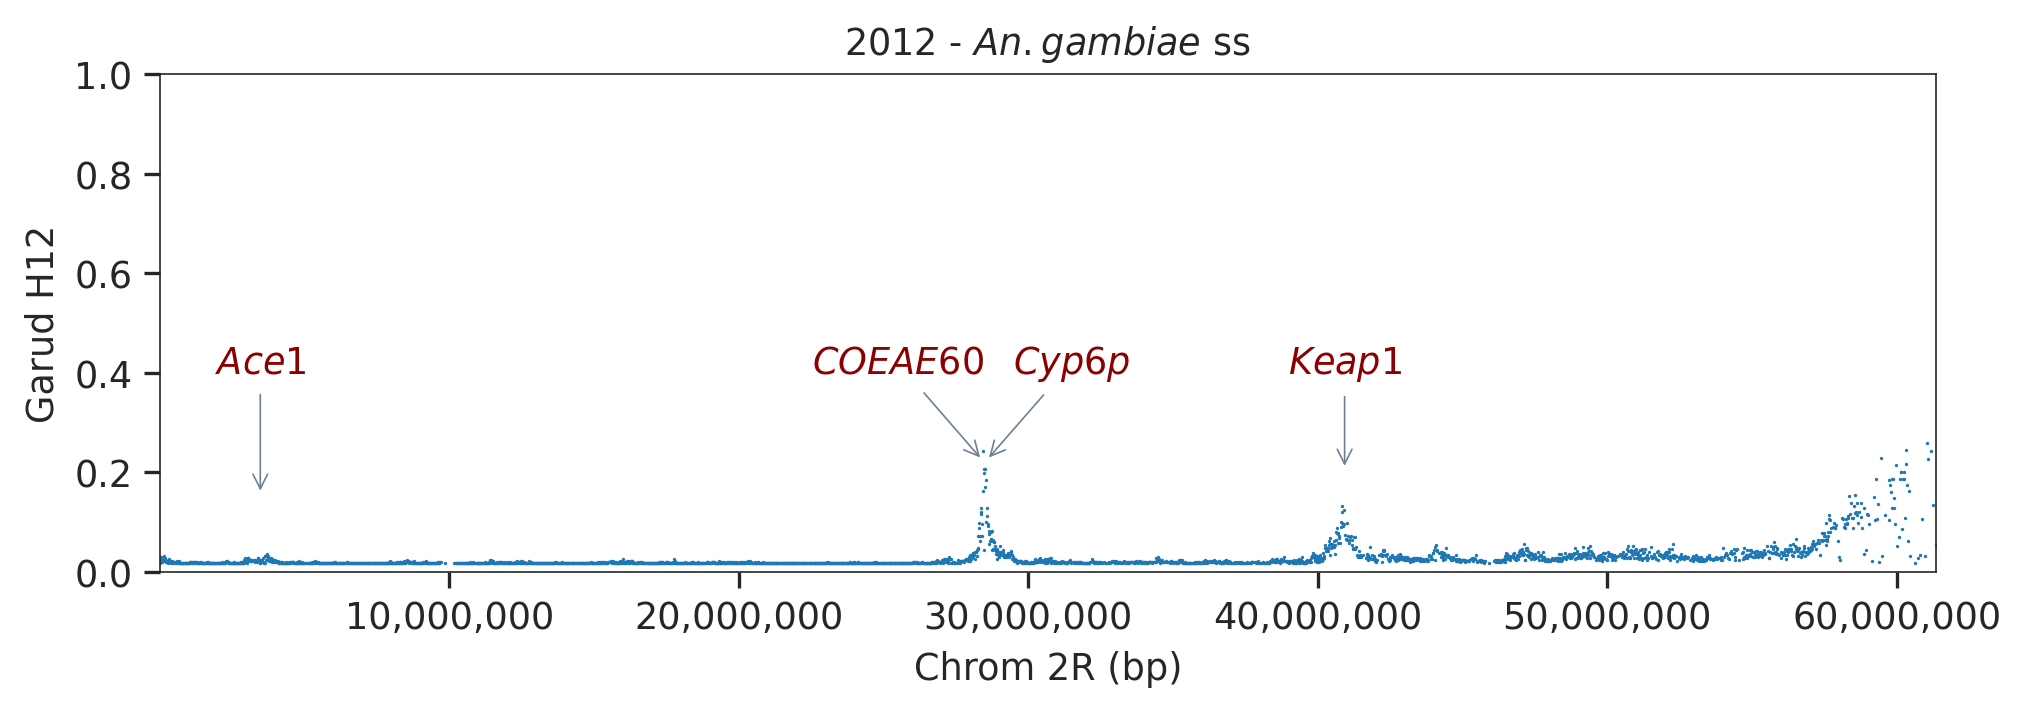

In [19]:
## Garud H12 plot in the chromosome 2
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax0, xlab='2R', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.22), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

<ipython-input-20-b79a5a565c96>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-7-d99a639cd7e1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


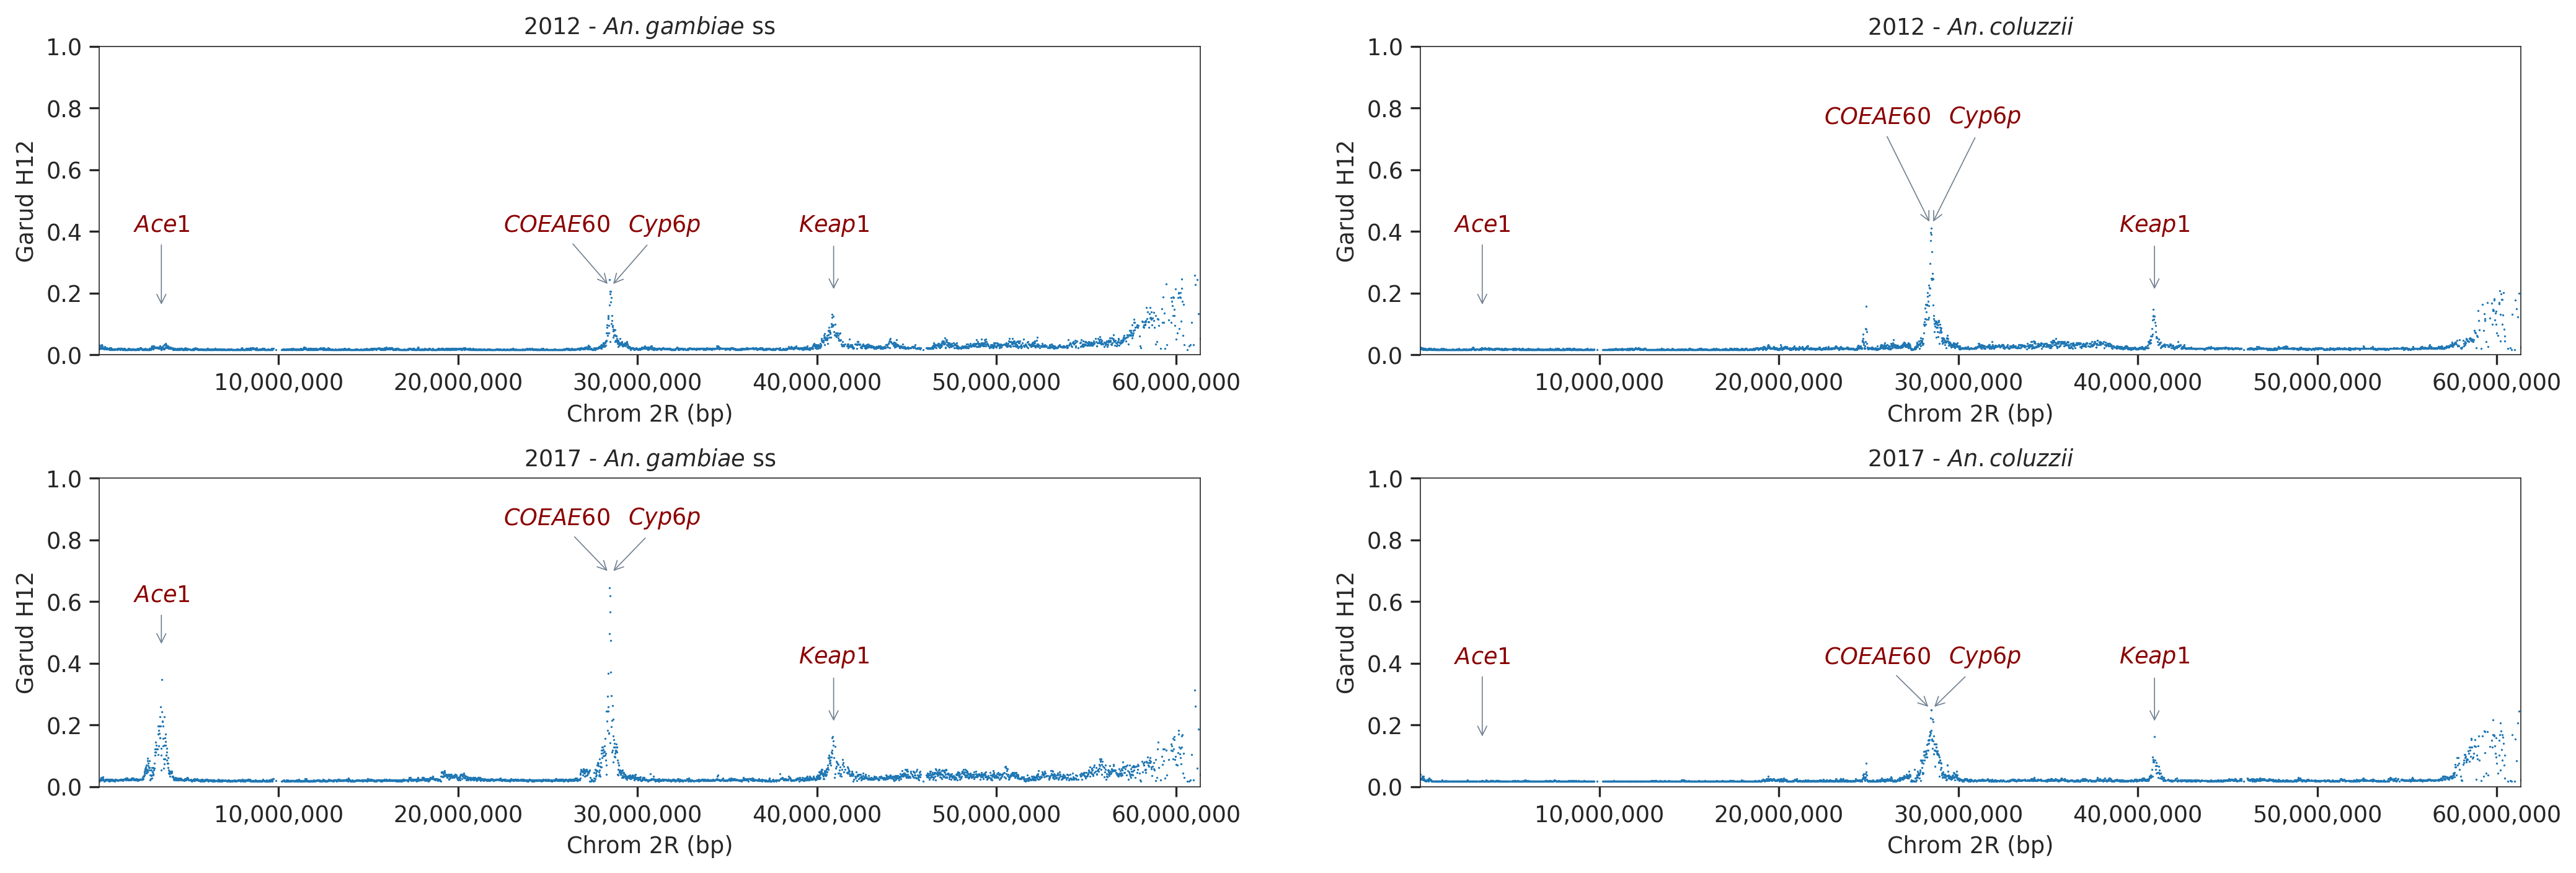

In [20]:
## Garud H12 plot in the chromosome 2
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax0, xlab='2R', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([28491242, 28493314]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.22), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax1 = plt.subplot(gs[1, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2017,ax=ax1, xlab='2R', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.45), xytext=(np.mean([3438301, 3497400]), 0.6), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.69), xytext=(np.mean([28491242, 28493314]), 0.85), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.69), xytext=(np.mean([31491242, 31493314]), 0.85), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.69), xytext=(np.mean([25485262, 25487080]), 0.85), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax2 = plt.subplot(gs[0, 1])
fig_h12(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax2, xlab='2R', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.5), xytext=(np.mean([28491242, 28493314]), 0.75), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.42), xytext=(np.mean([31491242, 31493314]), 0.75), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([25485262, 25487080]), 0.75), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax3 = plt.subplot(gs[1, 1])
fig_h12(ydata_2R.pos, ydata_2R.coluzzii_2017,ax=ax3, xlab='2R', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([28491242, 28493314]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.25), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom2R_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-21-99dba7b9281a>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax4 = plt.subplot(gs[0, 0])
<ipython-input-7-d99a639cd7e1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


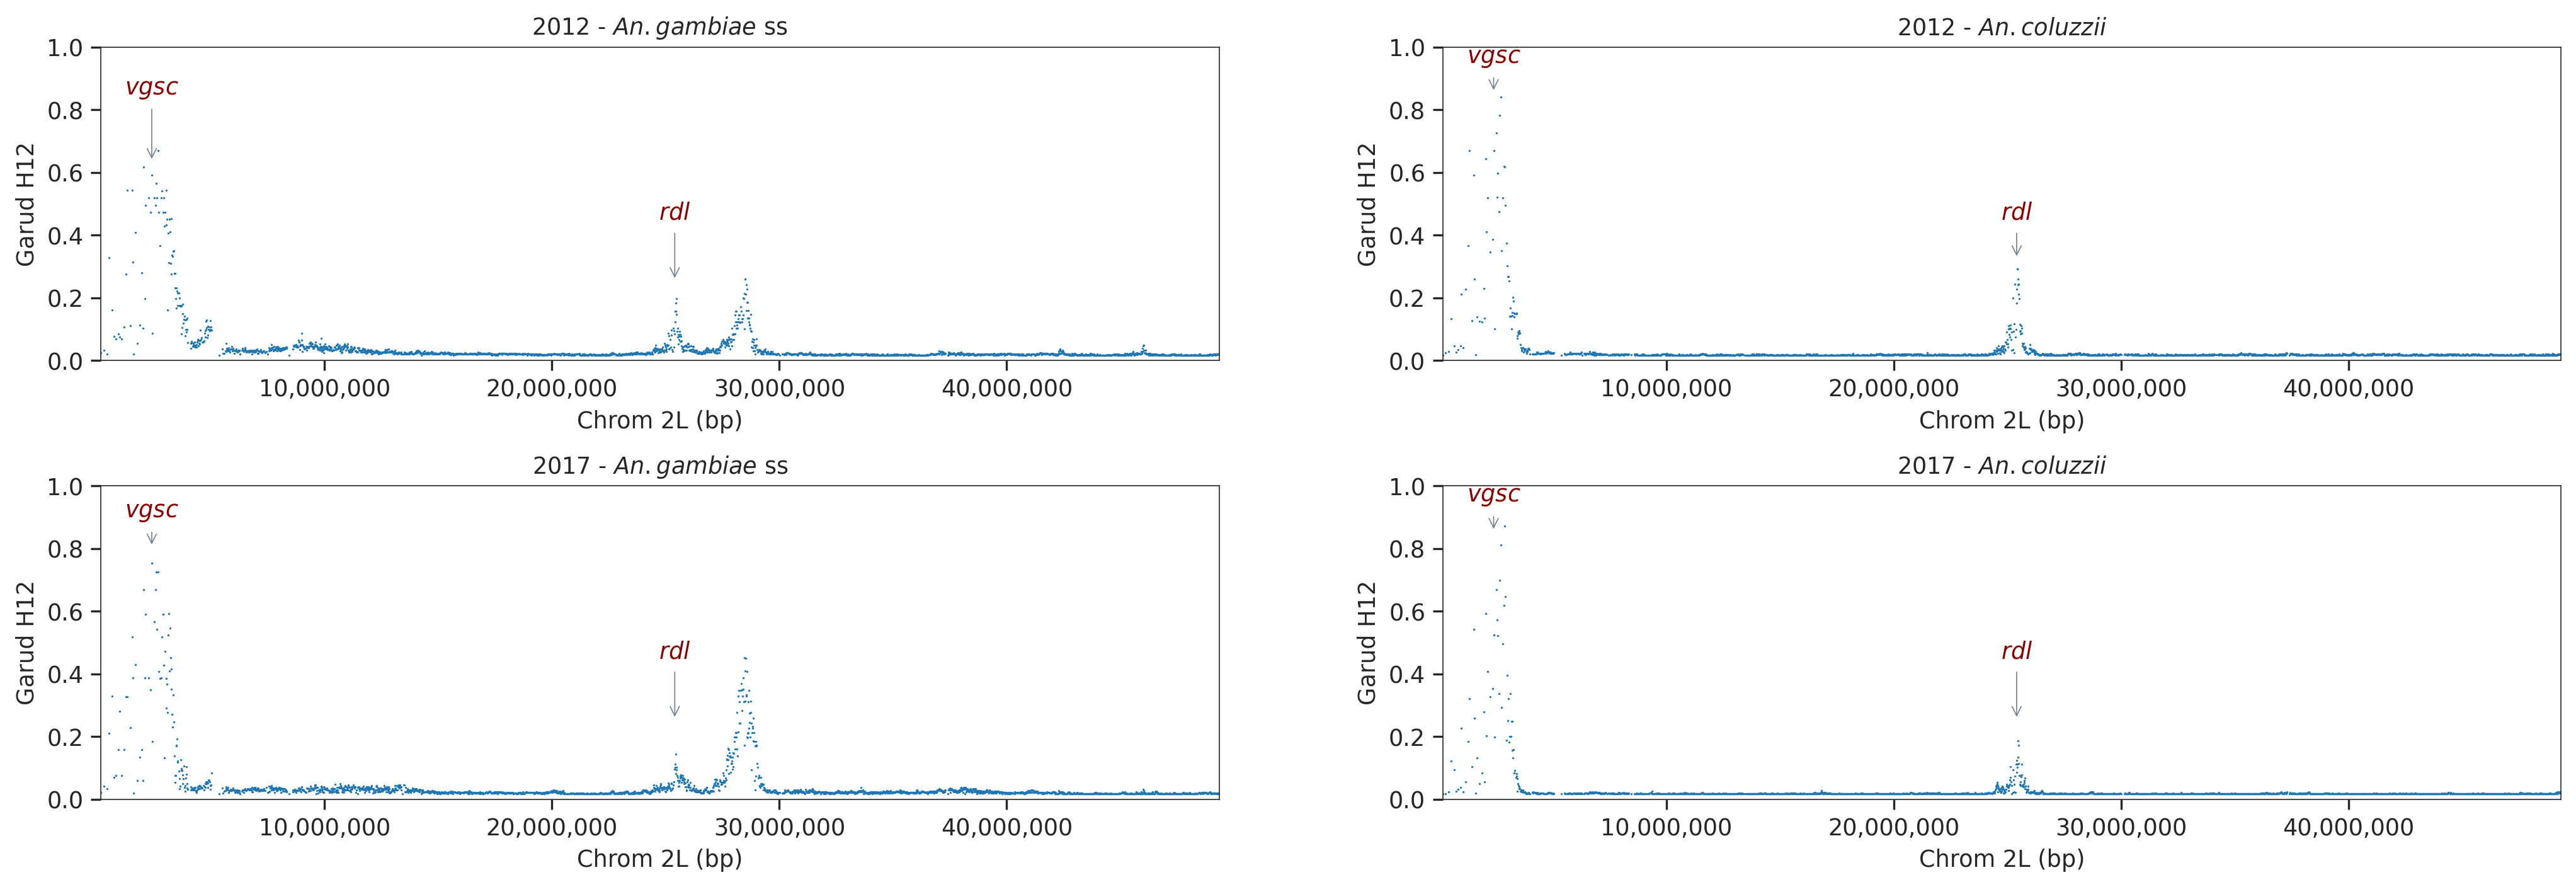

In [21]:
## Garud H12 plot in the chromosome 2
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax4 = plt.subplot(gs[0, 0])
fig_h12(ydata_2L.pos, ydata_2L.gambiae_2012, ax=ax4, xlab='2L', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.63), xytext=(np.mean([2358158, 2431617]), 0.85),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax5 = plt.subplot(gs[1, 0])
fig_h12(ydata_2L.pos, ydata_2L.gambiae_2017,ax=ax5, xlab='2L', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.80), xytext=(np.mean([2358158, 2431617]), 0.90),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax6 = plt.subplot(gs[0, 1])
fig_h12(ydata_2L.pos, ydata_2L.coluzzii_2012, ax=ax6, xlab='2L', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.85), xytext=(np.mean([2358158, 2431617]), 0.95),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.32), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax7 = plt.subplot(gs[1, 1])
fig_h12(ydata_2L.pos, ydata_2L.coluzzii_2017,ax=ax7, xlab='2L', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.85), xytext=(np.mean([2358158, 2431617]), 0.95),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom2L_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-22-5504bb83c50f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-7-d99a639cd7e1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


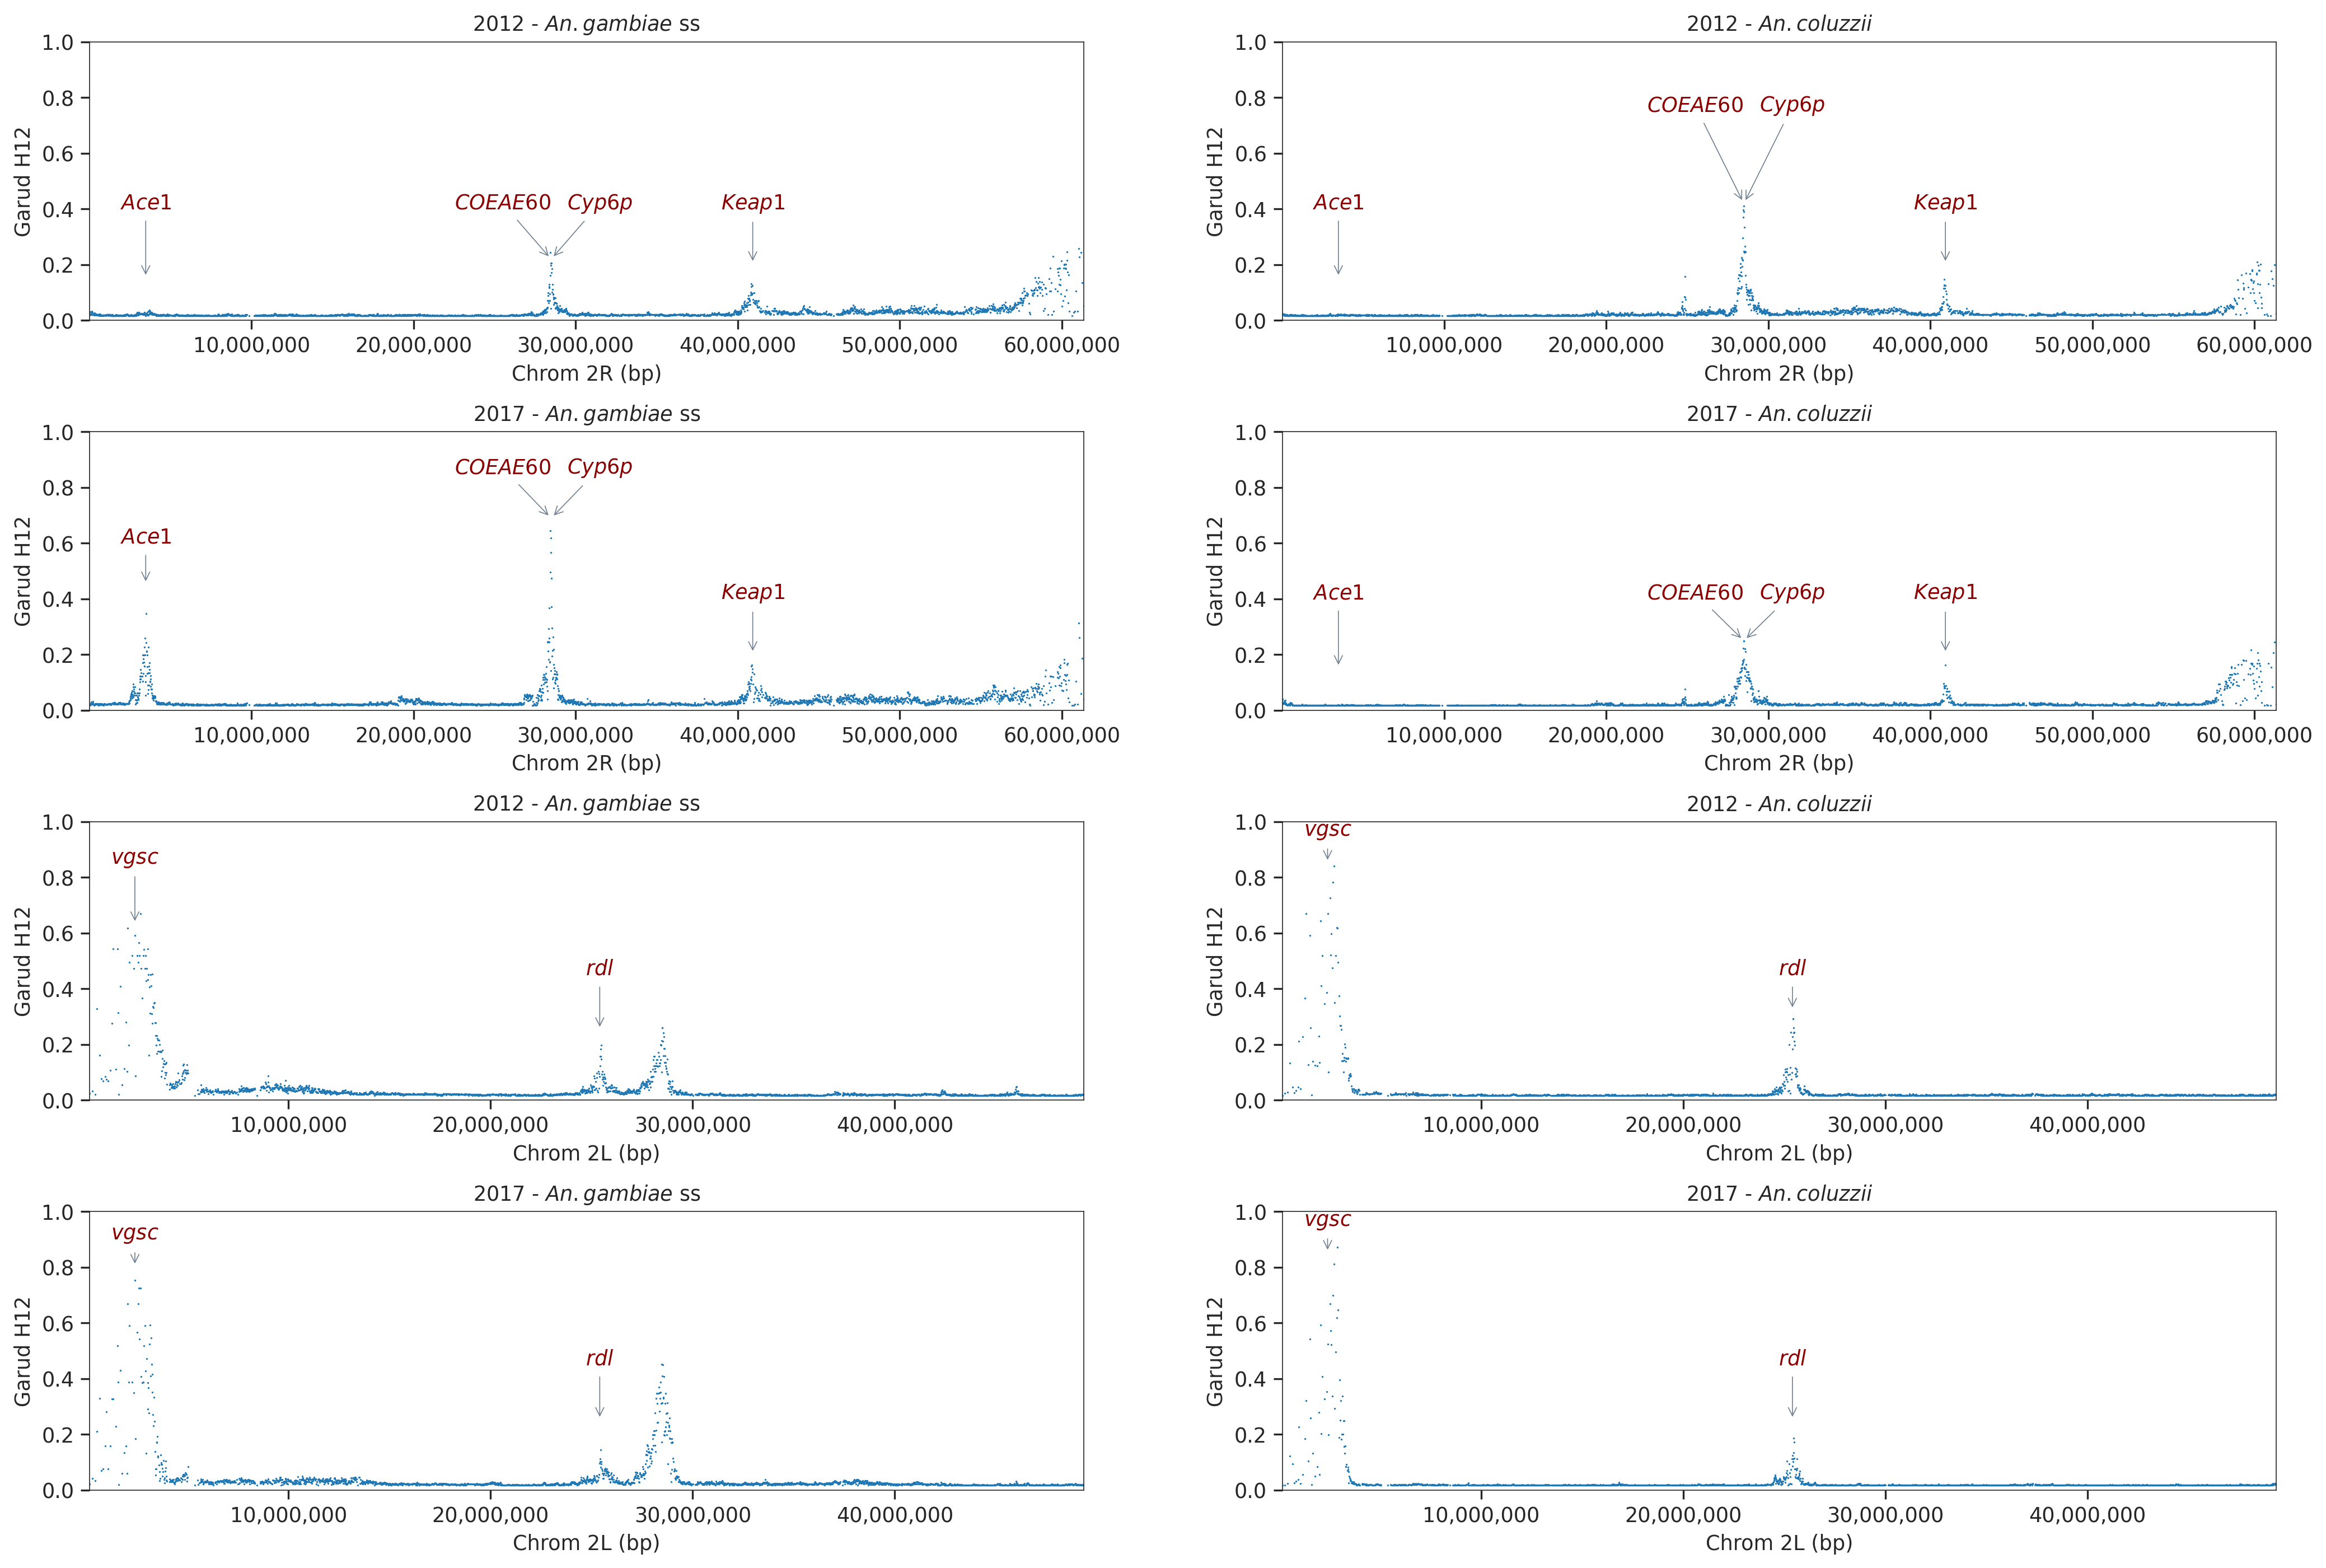

In [22]:
## Garud H12 plot in the chromosome 2
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2012, ax=ax0, xlab='2R', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([28491242, 28493314]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.22), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.22), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax1 = plt.subplot(gs[1, 0])
fig_h12(ydata_2R.pos, ydata_2R.gambiae_2017,ax=ax1, xlab='2R', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.45), xytext=(np.mean([3438301, 3497400]), 0.6), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.69), xytext=(np.mean([28491242, 28493314]), 0.85), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.69), xytext=(np.mean([31491242, 31493314]), 0.85), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.69), xytext=(np.mean([25485262, 25487080]), 0.85), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax2 = plt.subplot(gs[0, 1])
fig_h12(ydata_2R.pos, ydata_2R.coluzzii_2012, ax=ax2, xlab='2R', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.5), xytext=(np.mean([28491242, 28493314]), 0.75), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.42), xytext=(np.mean([31491242, 31493314]), 0.75), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.42), xytext=(np.mean([25485262, 25487080]), 0.75), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax3 = plt.subplot(gs[1, 1])
fig_h12(ydata_2R.pos, ydata_2R.coluzzii_2017,ax=ax3, xlab='2R', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(3438301, 3497400, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Ace1$', xy=(np.mean([3438301, 3497400]), 0.15), xytext=(np.mean([3438301, 3497400]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(28491242, 28493314, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([28491242, 28493314]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$Cyp6p$', xy=(np.mean([28491242, 28493314]), 0.25), xytext=(np.mean([31491242, 31493314]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
plt.annotate('$COEAE60$', xy=(np.mean([28485262, 28487080]), 0.25), xytext=(np.mean([25485262, 25487080]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(40926764 , 40930610, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Keap1$', xy=(np.mean([40926764 , 40930610]), 0.2), xytext=(np.mean([40926764 , 40930610]), 0.4), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(48703664, 48792262, color='magenta', alpha=0.2, lw=0.3)
#plt.annotate('$Dsx$', xy=(np.mean([48703664, 48792262]), 0.15), xytext=(np.mean([48703664, 48792262]), 0.4), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax4 = plt.subplot(gs[2, 0])
fig_h12(ydata_2L.pos, ydata_2L.gambiae_2012, ax=ax4, xlab='2L', ylab=True, title='2012 - $An. gambiae$ ss ')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.63), xytext=(np.mean([2358158, 2431617]), 0.85),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax5 = plt.subplot(gs[3, 0])
fig_h12(ydata_2L.pos, ydata_2L.gambiae_2017,ax=ax5, xlab='2L', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.80), xytext=(np.mean([2358158, 2431617]), 0.90),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax6 = plt.subplot(gs[2, 1])
fig_h12(ydata_2L.pos, ydata_2L.coluzzii_2012, ax=ax6, xlab='2L', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.85), xytext=(np.mean([2358158, 2431617]), 0.95),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.32), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax7 = plt.subplot(gs[3, 1])
fig_h12(ydata_2L.pos, ydata_2L.coluzzii_2017,ax=ax7, xlab='2L', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(2358158, 2431617, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$vgsc$', xy=(np.mean([2358158, 2431617]), 0.85), xytext=(np.mean([2358158, 2431617]), 0.95),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(25363652, 25434556, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$rdl$ ', xy=(np.mean([25363652, 25434556]), 0.25), xytext=(np.mean([25363652, 25434556]), 0.45),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom2_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-23-18602c9f7f80>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-7-d99a639cd7e1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


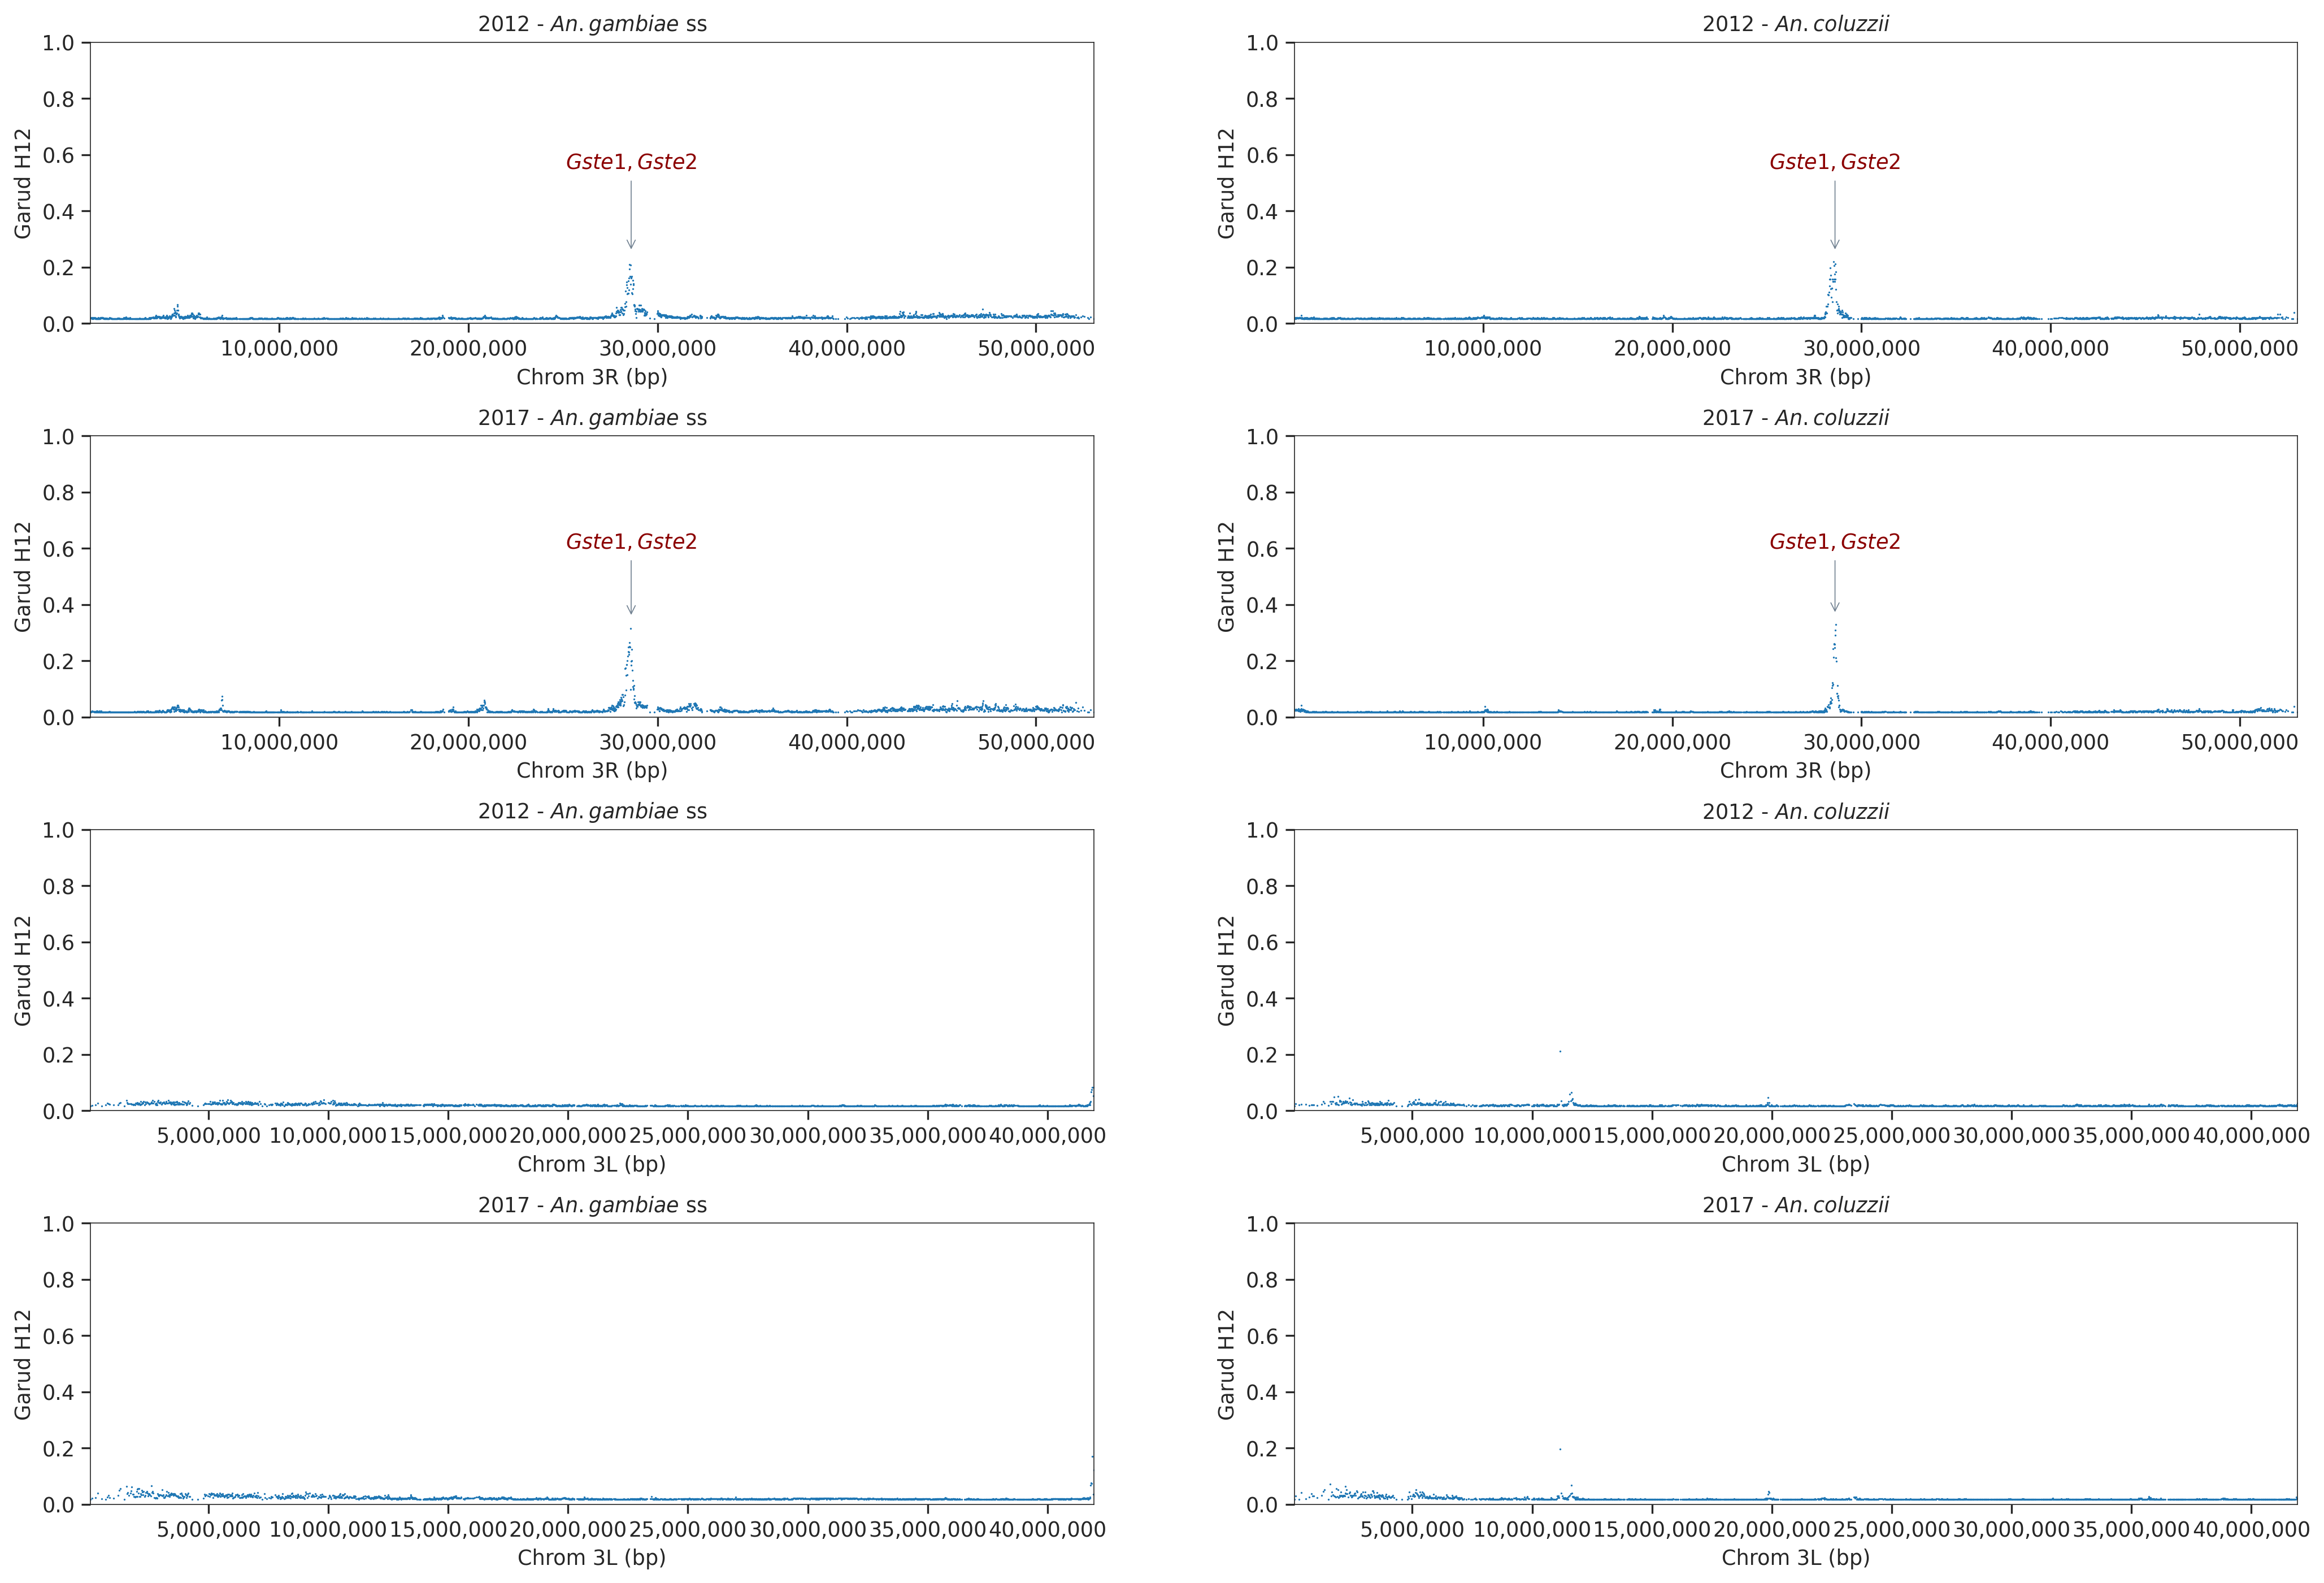

In [23]:
## Garud H12 plot in the chromosome 3
fig, ax = plt.subplots(figsize=(21,14))
gs = GridSpec(4, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_3R.pos, ydata_3R.gambiae_2012, ax=ax0, xlab='3R', ylab=True, title='2012 - $An. gambiae$ ss')
#plt.axvspan(28597652, 28599816, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.25), xytext=(np.mean([28597652, 28599816]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax1 = plt.subplot(gs[1, 0])
fig_h12(ydata_3R.pos, ydata_3R.gambiae_2017,ax=ax1, xlab='3R', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(28597652, 28599816, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.35), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax2 = plt.subplot(gs[0, 1])
fig_h12(ydata_3R.pos, ydata_3R.coluzzii_2012, ax=ax2, xlab='3R', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(28597652, 28599816, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.25), xytext=(np.mean([28597652, 28599816]), 0.55),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax3 = plt.subplot(gs[1, 1])
fig_h12(ydata_3R.pos, ydata_3R.coluzzii_2017, ax=ax3, xlab='3R', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(28597652, 28599816, color='magenta', alpha=0.2, lw=0.3)
plt.annotate('$Gste1, Gste2$', xy=(np.mean([28597652, 28599816]), 0.36), xytext=(np.mean([28597652, 28599816]), 0.6),
             color='darkred', arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax4 = plt.subplot(gs[2, 0])
fig_h12(ydata_3L.pos, ydata_3L.gambiae_2012, ax=ax4, xlab='3L', ylab=True, title='2012 - $An. gambiae$ ss')

ax5 = plt.subplot(gs[3, 0])
fig_h12(ydata_3L.pos, ydata_3L.gambiae_2017,ax=ax5, xlab='3L', ylab=True, title='2017 - $An. gambiae$ ss')

ax6 = plt.subplot(gs[2, 1])
fig_h12(ydata_3L.pos, ydata_3L.coluzzii_2012, ax=ax6, xlab='3L', ylab=True, title='2012 - $An. coluzzii$')

ax7 = plt.subplot(gs[3, 1])
fig_h12(ydata_3L.pos, ydata_3L.coluzzii_2017,ax=ax7, xlab='3L', ylab=True, title='2017 - $An. coluzzii$')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chrom3_gh12.png", dpi=300, bbox_inches='tight')

<ipython-input-14-2aa520aea932>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0, 0])
<ipython-input-7-d99a639cd7e1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


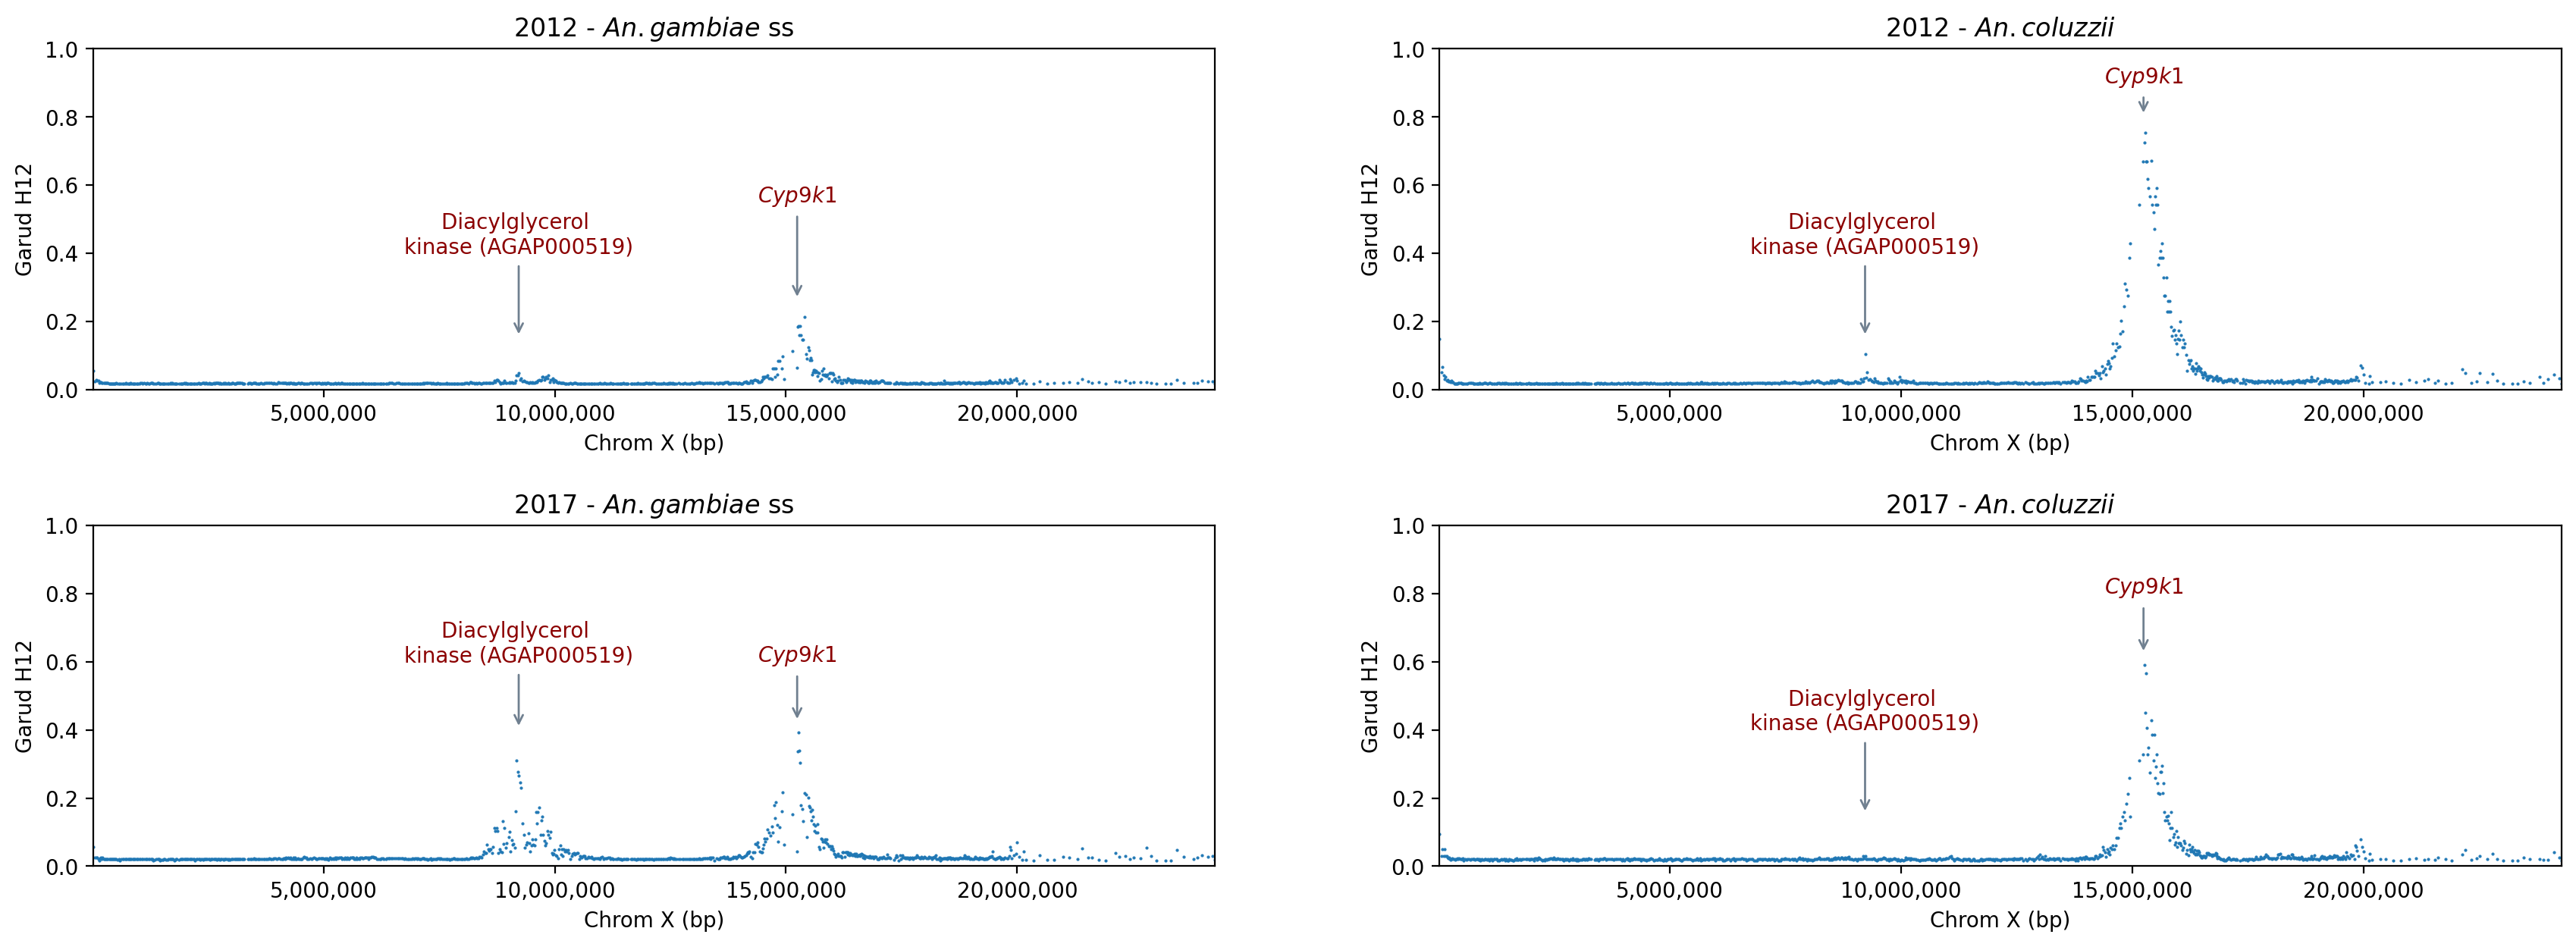

In [14]:
## Garud H12 plot in the chromosome X
fig, ax = plt.subplots(figsize=(21,7))
gs = GridSpec(2, 2, hspace = 0.4, figure=fig)

ax0 = plt.subplot(gs[0, 0])
fig_h12(ydata_X.pos, ydata_X.gambiae_2012, ax=ax0, xlab='X', ylab=True, title='2012 - $An. gambiae$ ss')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.26), xytext=(np.mean([15240572, 15242864]), 0.55), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax1 = plt.subplot(gs[1, 0])
fig_h12(ydata_X.pos, ydata_X.gambiae_2017,ax=ax1, xlab='X', ylab=True, title='2017 - $An. gambiae$ ss')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.40), xytext=(np.mean([9200001,9240000]), 0.6), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.42), xytext=(np.mean([15240572, 15242864]), 0.6), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax2 = plt.subplot(gs[0, 1])
fig_h12(ydata_X.pos, ydata_X.coluzzii_2012, ax=ax2, xlab='X', ylab=True, title='2012 - $An. coluzzii$')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.8), xytext=(np.mean([15240572, 15242864]), 0.9), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

ax3 = plt.subplot(gs[1, 1])
fig_h12(ydata_X.pos, ydata_X.coluzzii_2017, ax=ax3, xlab='X', ylab=True, title='2017 - $An. coluzzii$')
#plt.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
#plt.annotate('$Fru$', xy=(np.mean([1283016, 1373662]), 0.15), xytext=(np.mean([1283016, 1373662]), 0.35), color='darkred',
#             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(9200001,9240000, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('Diacylglycerol \nkinase (AGAP000519)', xy=(np.mean([9200001,9240000]), 0.15), xytext=(np.mean([9200001,9240000]), 0.40), color='darkred',
             arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')
#plt.axvspan(15240572, 15242864, color='magenta', alpha=0.2, lw=0.2)
plt.annotate('$Cyp9k1$', xy=(np.mean([15240572, 15242864]), 0.62), xytext=(np.mean([15240572, 15242864]), 0.8), color='darkred',
            arrowprops=dict(arrowstyle="->", color='slategrey'), ha='center')

fig.savefig(f"drive/MyDrive/Genomic/Haplotype_statistics/chromX_gh12.png", dpi=300, bbox_inches='tight')